In [71]:
# all the inmports here
import pandas as pd
import numpy as np
count_data_path=(r'C:\Users\manos\OneDrive - Vrije Universiteit Amsterdam\VU\ML\TCGA_dataset\TCGA_dataset\tcga_rna_count_data_crc.csv') 
prediction_data_path=(r'C:\Users\manos\OneDrive - Vrije Universiteit Amsterdam\VU\ML\TCGA_dataset\TCGA_dataset\prediction_file_crc.csv')

In [72]:
count_df=pd.read_csv(count_data_path)
pred_df=pd.read_csv(prediction_data_path)

In [73]:
value_counts=pred_df['msi_status'].value_counts()
percentage= value_counts/len(pred_df)*100
print(percentage)

MSS              63.419913
MSI-L            15.800866
MSI-H            14.935065
Indeterminate     0.432900
Name: msi_status, dtype: float64


Convert the MSI-H and MSI_L to MSI

In [74]:
pred_df['msi_status']=pred_df['msi_status'].replace({'MSI-H':0, "MSI-L": 1,'MSS':1})

Categorical to numerical MSI=0 , MSS=1 (BINARY)

In [75]:
value_counts=pred_df['msi_status'].value_counts()
percentage= value_counts/len(pred_df)*100
print(percentage)

1                79.220779
0                14.935065
Indeterminate     0.432900
Name: msi_status, dtype: float64


Remove Indeterminate & unknown Values

In [76]:
pred_df = pred_df[pred_df['msi_status'] != 'Indeterminate']
pred_df = pred_df[pred_df['msi_status'].isin([0,1])]

Get dumies to convert categorical to numerical

In [77]:
pred_df_num = pd.get_dummies(pred_df, columns=['TP53'])
pred_df_num = pd.get_dummies(pred_df_num, columns=['KRAS'])
pred_df_num = pd.get_dummies(pred_df_num, columns=['BRAF'])
pred_df_num = pd.get_dummies(pred_df_num, columns=['APC'])
pred_df_num = pd.get_dummies(pred_df_num, columns=['TTN'])

Enumarate Sample ids  in a dictionary save the dict in a file replace ids with keys

In [78]:
id_to_num = {}
for i, id in enumerate(pred_df_num['Unnamed: 0'].unique()):
    id_to_num[id] = i

# Save the dictionary to a file
import json
with open('id_to_num.json', 'w') as f:
    json.dump(id_to_num, f)

# Replace the IDs with the corresponding numbers in the DataFrame
pred_df_num['Unnamed: 0'] = pred_df_num['Unnamed: 0'].map(id_to_num)

In [79]:
pred_df_num

,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53_SNV,TP53_WT,KRAS_SNV,KRAS_WT,BRAF_SNV,BRAF_WT,APC_SNV,APC_WT,TTN_SNV,TTN_WT
0,0,19,1,0.114119,6,118,0,1,0,1,1,0,1,0,0,1
1,1,38,1,0.311631,12,81,1,0,1,0,0,1,0,1,0,1
3,2,87,1,0.422921,13,159,1,0,1,0,0,1,1,0,1,0
4,3,28,1,0.357734,12,72,1,0,0,1,0,1,1,0,0,1
5,4,3,0,0.049432,2,1828,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,430,104,1,0.309643,9,209,1,0,1,0,0,1,1,0,1,0
458,431,105,1,0.270808,10,115,1,0,0,1,0,1,1,0,0,1
459,432,82,1,0.408573,15,143,1,0,1,0,0,1,1,0,0,1
460,433,115,1,0.178141,6,150,1,0,0,1,0,1,0,1,0,1


Balancing (Requires further exploration)

In [80]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # Separate majority and minority classes
# majority_class = pred_df_num[pred_df_num['msi_status'] == 1]
# minority_class = pred_df_num[pred_df_num['msi_status'] == 0]

# # Remove unknown and intermediate values from minority class
# minority_class = minority_class[minority_class['msi_status'].isin([0,1])]

# # Apply SMOTE oversampling to minority class
# oversampler = SMOTE(random_state=42)
# minority_oversampled, minority_labels_oversampled = oversampler.fit_resample(minority_class.drop('msi_status', axis=1), minority_class['msi_status'])

# # Apply RandomUnderSampler to majority class
# undersampler = RandomUnderSampler(random_state=42)
# majority_undersampled, majority_labels_undersampled = undersampler.fit_resample(majority_class.drop('msi_status', axis=1), majority_class['msi_status'])

# # Combine oversampled and undersampled data
# df_balanced = pd.concat([majority_undersampled, minority_oversampled])
# df_balanced['msi_status'] = pd.concat([majority_labels_undersampled, minority_labels_oversampled])

# # Verify the class distribution of the balanced data
# print(df_balanced['msi_status'].value_counts())


# **Prepro Count Data**

Remove Genes with Zero counts in all Samples

In [81]:
# Check which genes have zero counts in all samples
zero_count_genes = count_df.columns[count_df.eq(0).all(axis=0)]

# Remove genes with zero counts from dataframe
count_df = count_df.drop(columns=zero_count_genes)

In [82]:
count_df

,Unnamed: 0,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,ND4,282779,527763,351929,287719,190175,534458,258680,609116,1788482,...,967151,253949,357582,193103,378175,241368,174340,344243,187689,120685
1,COX1,174425,550980,221923,77856,126014,573269,334800,988344,882782,...,503826,178148,277609,169953,328256,270218,159090,244393,186843,113810
2,COX2,215346,455961,219310,224206,121250,539229,239678,729632,770006,...,688044,100534,233873,148345,196468,253742,107697,196681,104451,99580
3,COX3,215935,224912,194021,249685,163588,640377,215029,496405,509296,...,656321,119946,133931,76543,247324,265639,130445,200891,90755,137800
4,ACTB,114483,273373,111800,266851,94666,199718,508419,342245,275784,...,264552,123410,150556,171336,90398,371604,124204,210810,235117,150755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,PRAMEF13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33375,OR8B4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33376,OR1S1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33377,PRAMEF26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 Remove POLE POLD genes from count data

In [83]:
count_df_01 = count_df[count_df.iloc[:,0] != 'POLE']
count_df_02 = count_df_01[count_df_01.iloc[:,0] != 'POLD1']

In [84]:
count_df_norm=count_df_02.iloc[:,1:]

One common normalization technique for RNA-seq data is called "library size normalization". This involves dividing the raw counts of each sample by the total number of reads in that sample, and then multiplying the result by a scaling factor (e.g., 1 million) to get "counts per million" (CPM) or "reads per million" (RPM).

In [85]:
# Calculate library sizes (total number of reads) for each sample
library_sizes = count_df_norm.sum(axis=0)

# Normalize counts by library size and scale to CPM
cpm_df = count_df_norm.divide(library_sizes, axis=1) * 1e6

add back the names of the genes

In [86]:
# Get the names of the genes
gene_names = count_df_02.iloc[:, 0]

# Insert the gene names at the beginning of the cpm_df dataframe
cpm_df.insert(loc=0, column='Gene Name', value=gene_names)

In [87]:
pred_df_num

,Unnamed: 0,TBL,msi_status,fraction_genome_altered,aneuploidy_score,TMB,TP53_SNV,TP53_WT,KRAS_SNV,KRAS_WT,BRAF_SNV,BRAF_WT,APC_SNV,APC_WT,TTN_SNV,TTN_WT
0,0,19,1,0.114119,6,118,0,1,0,1,1,0,1,0,0,1
1,1,38,1,0.311631,12,81,1,0,1,0,0,1,0,1,0,1
3,2,87,1,0.422921,13,159,1,0,1,0,0,1,1,0,1,0
4,3,28,1,0.357734,12,72,1,0,0,1,0,1,1,0,0,1
5,4,3,0,0.049432,2,1828,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,430,104,1,0.309643,9,209,1,0,1,0,0,1,1,0,1,0
458,431,105,1,0.270808,10,115,1,0,0,1,0,1,1,0,0,1
459,432,82,1,0.408573,15,143,1,0,1,0,0,1,1,0,0,1
460,433,115,1,0.178141,6,150,1,0,0,1,0,1,0,1,0,1


In [88]:
cpm_df 

,Gene Name,TCGA-CK-5912-01A,TCGA-QG-A5Z2-01A,TCGA-AG-3898-01A,TCGA-G4-6299-01A,TCGA-AG-4008-01A,TCGA-NH-A8F8-01A,TCGA-AD-6548-01A,TCGA-AA-A02Y-01A,TCGA-EI-6514-01A,...,TCGA-CL-5918-01A,TCGA-AG-A01Y-01A,TCGA-AG-A014-01A,TCGA-AG-A016-01A,TCGA-AA-3846-01A,TCGA-CA-5797-01A,TCGA-AA-3860-01A,TCGA-CK-4951-01A,TCGA-EI-6507-01A,TCGA-AA-3858-01A
0,ND4,7439.062895,8792.765169,17741.598452,6450.806633,10379.725197,13618.803856,4883.319842,10904.053119,34408.636657,...,22366.585071,10081.295778,19156.392713,10920.245725,18030.805728,4613.034188,8050.727061,13644.701244,3828.225667,5582.080285
1,COX1,4588.595848,9179.570665,11187.679200,1745.571204,6877.826691,14607.767247,6320.301079,17692.780153,16983.858426,...,11651.610855,7072.139210,14872.076963,9611.080727,15650.744139,5164.416460,7346.507790,9686.963776,3810.970106,5264.088803
2,COX2,5665.103979,7596.512070,11055.951503,5026.812800,6617.808230,13740.376202,4524.603112,13061.462981,14814.158978,...,15911.884141,3991.009966,12529.050771,8389.117994,9367.293818,4849.526536,4973.265758,7795.811346,2130.449835,4605.904253
3,COX3,5680.598793,3747.133467,9781.071390,5598.064967,8928.610414,16317.781297,4059.283216,8886.363990,9798.354702,...,15178.249808,4761.629711,7174.955206,4328.614100,11792.030134,5076.902442,6023.730019,7962.682400,1851.097403,6373.705624
4,ACTB,3011.702557,4554.515176,5636.110428,5982.935436,5166.857187,5089.118824,9597.852910,6126.678103,5305.813227,...,6118.098222,4899.143970,8065.590162,9689.291319,4310.038411,7102.109461,5735.531169,8355.840116,4795.597686,6972.917209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33374,PRAMEF13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33375,OR8B4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33376,OR1S1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33377,PRAMEF26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
print(cpm_df.shape)
print(pred_df_num.shape)

(33377, 463)
(435, 16)


Transpose counts df

In [90]:
cpm_df = cpm_df.transpose()

# Now remove the samples from the count_df that we dont have msi values for

Add sample names back to pred_df

In [91]:
# Load the mapping dictionary from the file
import json
with open('id_to_num.json', 'r') as f:
    num_to_id = json.load(f)

# Reverse the mapping dictionary
num_to_id = {v: k for k, v in num_to_id.items()}

# Map the numbers back to the gene names
pred_df_num['Unnamed: 0'] = pred_df_num['Unnamed: 0'].map(num_to_id)

Remove the samples

In [92]:
# Set the first row as column names
cpm_df = cpm_df.set_axis(cpm_df.iloc[0], axis=1)

# Dropa the first row after setting column names
cpm_df = cpm_df[1:]

In [93]:
pred_df_num = pred_df_num.set_index('Unnamed: 0')

In [94]:
# Get the common sample names between the two dataframes
common_samples = set(cpm_df.index).intersection(set(pred_df_num.index))

print("Number of common samples:", len(common_samples))
print("Samples in cpm_df but not in pred_df_num:", set(cpm_df.index) - common_samples)
print("Samples in pred_df_num but not in cpm_df:", set(pred_df_num.index) - common_samples)

# Reduce cpm_df to only the common samples
cpm_df_common = cpm_df.loc[common_samples]

# Reduce pred_df_num to only the common samples
pred_df_common = pred_df_num.loc[common_samples]


Number of common samples: 435
Samples in cpm_df but not in pred_df_num: {'TCGA-D5-6540-01A', 'TCGA-AA-3956-01A', 'TCGA-AA-A02O-01A', 'TCGA-CA-6718-01A', 'TCGA-A6-3810-01A', 'TCGA-F5-6814-01A', 'TCGA-AG-A032-01A', 'TCGA-A6-2684-01A', 'TCGA-AA-A03F-01A', 'TCGA-A6-5659-01A', 'TCGA-AA-A02Y-01A', 'TCGA-AA-A01R-01A', 'TCGA-4T-AA8H-01A', 'TCGA-AA-A01S-01A', 'TCGA-A6-3809-01A', 'TCGA-A6-6780-01A', 'TCGA-AA-3666-01A', 'TCGA-AA-A01T-01A', 'TCGA-A6-2677-01A', 'TCGA-AG-3885-01A', 'TCGA-A6-2680-01A', 'TCGA-AG-3896-01A', 'TCGA-A6-6650-01A', 'TCGA-A6-5656-01A', 'TCGA-NH-A8F7-01A', 'TCGA-A6-2681-01A', 'TCGA-AG-4015-01A'}
Samples in pred_df_num but not in cpm_df: set()


C:\Users\manos\AppData\Local\Temp\ipykernel_17532\3429427196.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cpm_df_common = cpm_df.loc[common_samples]
C:\Users\manos\AppData\Local\Temp\ipykernel_17532\3429427196.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pred_df_common = pred_df_num.loc[common_samples]


In [95]:
cpm_df_common

Gene Name,ND4,COX1,COX2,COX3,ACTB,EEF1A1,CYTB,ACTG1,ND2,ATP6,...,MIR8060,RNU6-156P,MIR6082,RN7SL82P,TP53TG3F,PRAMEF13,OR8B4,OR1S1,PRAMEF26,DUX4L25
TCGA-CM-6162-01A,3018.5236,3142.484368,2163.196349,1983.679681,7670.607898,4605.565709,1313.730031,4406.048097,889.42722,1561.999944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AM-5820-01A,7721.87757,6964.507384,5923.792379,5470.57343,6792.47586,3686.07568,2687.118718,3816.452881,4900.626954,4128.839559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-DM-A28F-01A,5758.284953,9567.860735,10060.701823,7465.82396,9394.093861,3566.702344,4935.190893,3851.264618,2694.494502,3055.654431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AA-3713-01A,8364.108127,11747.942995,4958.916605,4278.595247,4660.966615,4382.514529,3986.847411,4702.541914,3621.678962,3400.848117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-CI-6619-01B,11883.738446,17031.496164,8934.483845,9356.118867,4533.280588,6531.32069,5440.536806,4104.171923,5508.296619,5095.423801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AG-A015-01A,16473.757103,12542.062865,12249.294299,10459.058217,6122.810039,7124.814494,10578.971412,3792.29654,4119.803191,6913.825167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AA-3869-01A,8380.11131,12700.280833,7297.584226,6787.067565,5715.874958,6561.942871,5361.249641,2778.807608,2288.168574,4252.881643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AD-6965-01A,1386.221378,2179.962035,1361.368647,1515.754443,5515.366341,5057.058908,592.769098,4834.590262,525.079486,479.463714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-CM-5864-01A,6140.774681,1947.339133,9136.2346,5231.169176,3960.275103,9484.516899,3200.464916,2934.982254,2743.429966,4097.599879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splittng the data into Train, Test, Validation Sets | changed the train_size=0.8

In [96]:
from sklearn.model_selection import train_test_split
pred_df_common['msi_status']=pred_df_common['msi_status'].astype(int)
X = cpm_df_common.iloc[:,1:]
y = pred_df_common['msi_status']

##  selected random state 42 so that now you get the same result each time you run the function
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6, random_state=42)

## validation data is the same size as your test set, but you can make it a littler smaller to get some more training data
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=42)


In [97]:
print('Xtrain',X_train.shape)
print('ytrain',y_train.shape)
print('Xtest',X_valid.shape)
print('Xvalid',X_test.shape)



Xtrain (261, 33376)
ytrain (261,)
Xtest (87, 33376)
Xvalid (87, 33376)


In [98]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot


In [99]:
X_train_val=X_train.astype(int)
y_train_val=y_train.astype(int)
# Calculate the correlation matrix between the X input features and y output feature
corr_matrix = X_train_val.corrwith(y_train_val)
#drop nan values
corr_matrix_nan=corr_matrix.dropna()
#convert to absolute
corr_matrix_abs=corr_matrix_nan.abs()
#sort values
coor_matrix_sorted=corr_matrix_abs.sort_values(ascending=False)
#set threshold
threshold = 0.3
#select features
Selected_features=coor_matrix_sorted[coor_matrix_sorted>=threshold]
Selected_features


Gene Name
TRIM7      0.688409
MLH1       0.634188
AGR2       0.628659
HPSE       0.611010
RPL22L1    0.609128
             ...   
CLCN7      0.300379
NECAP1     0.300247
AP5Z1      0.300127
ABAT       0.300088
SYS1       0.300020
Length: 1147, dtype: float64

In [100]:
#keep only the selected features in Xtrain, xtest,xvalid
X_train  =X_train.loc[:, X_train.columns.isin(Selected_features.index)]
X_test = X_test.loc[:, X_test.columns.isin(Selected_features.index)]
X_valid = X_valid.loc[:, X_valid.columns.isin(Selected_features.index)]

In [101]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Define the estimator for RFE
estimator=DecisionTreeClassifier()

# Define the number of features to select
n_features = 500

# Perform RFE
rfe = RFE(estimator, n_features_to_select=n_features)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
# Print the progress
for i, feature in enumerate(selected_features):
    print(f"{i+1}/{len(selected_features)} selected features: {feature}")

print('Selected Features:')

1/500 selected features: KCNK1
2/500 selected features: CTDP1
3/500 selected features: RHOU
4/500 selected features: SOCS6
5/500 selected features: MYLIP
6/500 selected features: CRYZ
7/500 selected features: STIM2
8/500 selected features: PGAP4
9/500 selected features: MRE11
10/500 selected features: MFAP1
11/500 selected features: ABHD10
12/500 selected features: TRIM69
13/500 selected features: ABAT
14/500 selected features: NMI
15/500 selected features: NAA38
16/500 selected features: TRMT2B
17/500 selected features: INPP1
18/500 selected features: MAFF
19/500 selected features: TTPAL
20/500 selected features: TDGF1
21/500 selected features: LARP1B
22/500 selected features: USPL1
23/500 selected features: ZBTB10
24/500 selected features: ADNP2
25/500 selected features: JKAMP
26/500 selected features: LTN1
27/500 selected features: SHROOM4
28/500 selected features: RBBP8
29/500 selected features: ZNRF2
30/500 selected features: GGT7
31/500 selected features: HCG18
32/500 selected fe

In [102]:
with open('selected_features from 33000 to 1000.txt', 'w') as f:
    # Write the selected features to the file, separated by commas
    f.write(','.join(selected_features))

In [103]:
X_train  =X_train.loc[:, X_train.columns.isin(selected_features)]
X_test = X_test.loc[:, X_test.columns.isin(selected_features)]
X_valid = X_valid.loc[:, X_valid.columns.isin(selected_features)]

try 500 from RFE top features, then RFM select top 200, and you train the RFM with the 200, to a new RFM and train and optimizing the hyperparameters of the RFM

In [104]:
from sklearn.ensemble import RandomForestClassifier as rf

randomForest = rf()
randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
importances = randomForest.feature_importances_
indices = np.argsort(importances)[::-1]
top_200_indices = indices[:200]

In [106]:
X_train_200 = X_train.iloc[:,top_200_indices]
X_test_200 = X_test.iloc[:,top_200_indices]
X_valid_200 = X_valid.iloc[:,top_200_indices]

In [107]:

X_train_200.to_csv('X_train200.csv', index=False)
X_test_200.to_csv('X_test200.csv', index=False)
X_valid_200.to_csv('X_valid200.csv', index=False)
y_train.to_csv('y_train1.csv', index=False)
y_test.to_csv('y_test1.csv', index=False)
y_valid.to_csv('y_valid1.csv', index=False)

In [108]:
X_train_200=X_train_200.values
X_train_200=X_train_200.astype(np.float32)

dont run below this

In [109]:
import tensorflow as tf
from sklearn.model_selection import ParameterSampler, StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Define the hyperparameter grid to search over
param_grid = {
    'hidden_layers': [(10,), (5,),(10,5),(20,),(20,5),(20,10)],
    'dropout_rate': [0.0],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ['sgd', 'adam', 'RMSprop',],
    'learning_rate': [0.0001,0.001,0.01]
    
}

# Define the number of hyperparameter combinations to sample
n_iter = (len(param_grid['hidden_layers'])* len(param_grid['dropout_rate'])
          *len(param_grid['activation'])*len(param_grid['optimizer'])*len(param_grid['learning_rate']))
print(n_iter)

# Sample hyperparameter combinations
param_combinations = list(ParameterSampler(param_grid, n_iter=n_iter))

# Define a function to build and compile a model given a set of hyperparameters
def build_model(params):
    model = tf.keras.Sequential()
    for num_units in params['hidden_layers']:
        model.add(tf.keras.layers.Dense(num_units, activation=params['activation']))
        model.add(tf.keras.layers.Dropout(params['dropout_rate']))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.get(params['optimizer'])
    optimizer.learning_rate = params['learning_rate']
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a function to evaluate a model using cross-validation
def evaluate_model(params, X_train, y_train):
    k = 5
    scores = []
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold = X_train[train_index]
        y_train_fold = y_train[train_index]
        X_val_fold = X_train[val_index]
        y_val_fold = y_train[val_index]
        model = KerasClassifier(build_fn=build_model, params=params, verbose=0)
        model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=64)
        y_val_pred = model.predict(X_val_fold)
        score = accuracy_score(y_val_fold, y_val_pred)
        scores.append(score)
    return np.mean(scores)

# Evaluate each hyperparameter combination using cross-validation
best_score = 0
best_params = None
scores_and_param=[]
import time
start_time = time.time()
for params in param_combinations:
    print(f'Evaluating params: {params}')
    score = evaluate_model(params, X_train_200, y_train)    
    scores_and_param.append(params)
    scores_and_param.append(score)
    print(f'Score: {score}')
    if score > best_score:
        best_score = score
        best_params = params
end_time = time.time()
import warnings
warnings.resetwarnings()

162
Evaluating params: {'optimizer': 'sgd', 'learning_rate': 0.0001, 'hidden_layers': (10,), 'dropout_rate': 0.0, 'activation': 'relu'}
2/2 [==============================] - 0s 3ms/step
Score: 0.7206821480406387
Evaluating params: {'optimizer': 'adam', 'learning_rate': 0.0001, 'hidden_layers': (10,), 'dropout_rate': 0.0, 'activation': 'relu'}
2/2 [==============================] - 0s 1ms/step
Score: 0.48396226415094334
Evaluating params: {'optimizer': 'RMSprop', 'learning_rate': 0.0001, 'hidden_layers': (10,), 'dropout_rate': 0.0, 'activation': 'relu'}
2/2 [==============================] - 0s 2ms/step
Score: 0.7354136429608128
Evaluating params: {'optimizer': 'sgd', 'learning_rate': 0.001, 'hidden_layers': (10,), 'dropout_rate': 0.0, 'activation': 'relu'}
2/2 [==============================] - 0s 3ms/step
Score: 0.8738751814223512
Evaluating params: {'optimizer': 'adam', 'learning_rate': 0.001, 'hidden_layers': (10,), 'dropout_rate': 0.0, 'activation': 'relu'}
2/2 [==================

In [110]:
print(best_params)
data = []
for i in range(0, len(scores_and_param), 2):
    row = scores_and_param[i].copy()
    row['score'] = scores_and_param[i+1]
    data.append(row)

df = pd.DataFrame(data)
df.sort_values(by='score', ascending=False)


{'optimizer': 'adam', 'learning_rate': 0.01, 'hidden_layers': (20, 10), 'dropout_rate': 0.0, 'activation': 'relu'}


,optimizer,learning_rate,hidden_layers,dropout_rate,activation,score
52,adam,0.0100,"(20, 10)",0.0,relu,0.961829
7,adam,0.0100,"(10,)",0.0,relu,0.953991
8,RMSprop,0.0100,"(10,)",0.0,relu,0.938752
16,adam,0.0100,"(5,)",0.0,relu,0.938679
97,adam,0.0100,"(20, 5)",0.0,tanh,0.935051
...,...,...,...,...,...,...
20,RMSprop,0.0001,"(10, 5)",0.0,relu,0.412264
156,sgd,0.0010,"(20, 10)",0.0,sigmoid,0.388970
153,sgd,0.0001,"(20, 10)",0.0,sigmoid,0.306821
108,sgd,0.0001,"(10,)",0.0,sigmoid,0.303120


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the scores from your list
scores = [item for item in scores_and_param if isinstance(item, float)]

# Sample hyperparameter combinations and evaluate them using cross-validation


# Calculate the mean and standard deviation of the validation scores for each hyperparameter combination
means = np.mean(scores, axis=1)
stds = np.std(scores, axis=1)

# Create a bar chart with error bars
fig, ax = plt.subplots()
ax.bar(np.arange(len(param_combinations)), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(np.arange(len(param_combinations)))
ax.set_xticklabels([str(params) for params in param_combinations], rotation='vertical')
ax.set_title('Validation scores for different hyperparameter settings')
plt.tight_layout()
plt.show()






In [ ]:
#best_params={'optimizer': 'adam', 'learning_rate': 0.01, 'hidden_layers': (20,), 'dropout_rate': 0.0, 'activation': 'relu'}

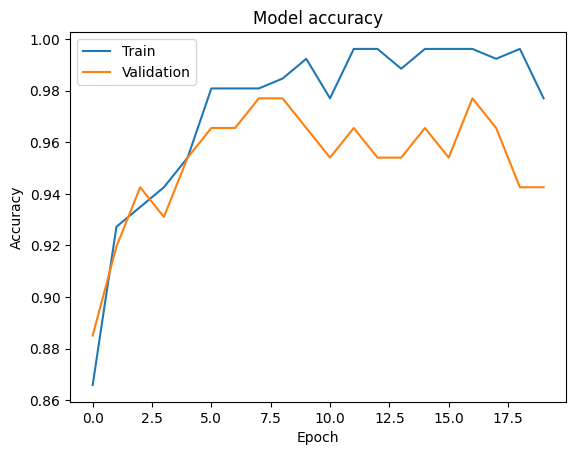

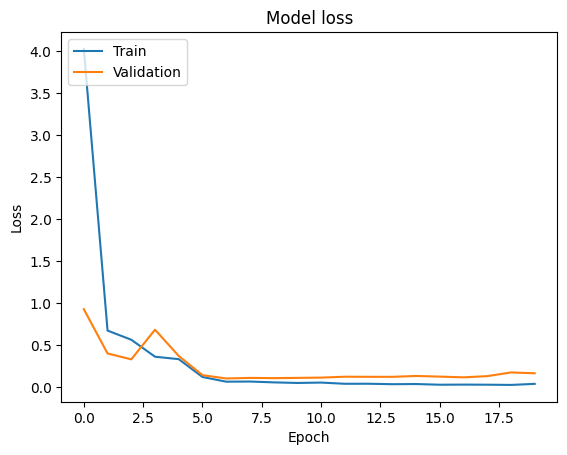

In [ ]:

# Build and train a new model using the best hyperparameters
best_model = build_model(best_params)
history = best_model.fit(X_train_200.astype(np.float32), y_train.astype(np.float32), 
                          epochs=20,validation_data=(X_valid_200.astype(np.float32), y_valid.astype(np.float32)),verbose=0)
# Plot the accuracy and validation accuracy over the epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


3/3 [==============================] - 0s 4ms/step


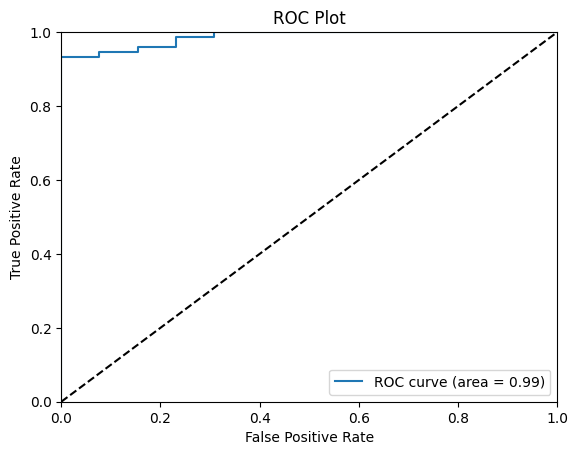

In [ ]:
# Predict probabilities on the test set
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = best_model.predict(X_test_200.astype(np.float32))

# Calculate false positive rate, true positive rate, and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot')
plt.legend(loc="lower right")
plt.show()